# Principal component analysis (PCA)

* [1. What is PCA?](#intro-pca)
* [2. Why do we need PCA?](#why-pca)
* [3. Key ideas of PCA?](#key-ideas)
* [4. Two ways of deriving PCA](#derivation)
    * [4.1 Maximum variance perspective](#max-var-perspective)
    * [4.2 Projection perspective](#proj-perspective)

* [5. Interpreting the projection matrix](#interpretation)
* [6. Computing the eigenvectors](#comp-eigenvec)
* [7. Summary of important terminology](#terminology)
* [8. Implementation](#implementation)
    * [8.1 Dataset](#dataset)
    * [8.2 Standardization](#standardization)
    * [8.3 Computing the data covariance matrix](#comp-cov-matrix)
    * [8.4 Computing eigenvectors and eigenvalues](#comp-eig-vecs)
    * [8.5 Choosing the number of eigenvalues](#num-eig-vals)
    * [8.6 Constructing the projection matrix](#proj-matrix)
    * [8.7 Projecting the data](#proj-data)
    * [8.8 Plotting the transformed data](#plot-data)
    * [8.9 Comparison to scikit-learn](#sklearn-comparison)

* [9. Sources and further reading](#sources)

## Link to interactive demo

[Click here]() to run the notebook online (using Binder) without installing jupyter or downloading the code.

Sometimes, the GitHub version of the Jupyter notebook does not display the math formulas correctly. Please refer to the Binder version in case you think something might be off or missing.

I also wrote a [blog post containing the contents of the notebook]().

## 1. What is PCA? <a class="anchor" id="intro-pca"></a>

In simple terms, principal component analysis (PCA) is a technique to perform dimensionality reduction. It has been around for more than 100 years and is still heavily used. Although PCA is most often applied to find a lower-dimensional representation of data, it can also be used for other purposes, e.g. to detect simple patterns in data. 

## 2. Why do we need PCA? <a class="anchor" id="why-pca"></a>
A lot of data is high-dimensional. Imagine patient data collected in a hospital. For each patient we can have hundreds or even thousands of measurements (blood pressure, heart rate, respiratory rate, etc.). Working with such data is difficult - it's expensive to store, hard to analyze and almost impossible to visualize.

Luckily, many dimensions in high-dimenstional data are often redundant and can be expressed by combining some of the other dimensions. Also, the key part of the data is often contained in a more compact lower-dimensional structure. Consequently, we can simplify high-dimensional datapoints using dimensionality reduction techniques like PCA.

## 3. Key ideas of PCA <a class="anchor" id="key-ideas"></a>
- PCA finds a lower-dimensional representation of data by constructing new features (called principal components) which are linear combinations of the original features
- The new features are selected carefully: PCA looks for features that can summarize the data best without losing too much information

## 4. Two ways of deriving PCA  <a class="anchor" id="derivation"></a>

Let's say we have an i.i.d dataset $\boldsymbol{X}$ with $D$ dimensions and a mean value of $0$:
$\mathcal{\boldsymbol{X}} = \{\boldsymbol{x}_1, ..., \boldsymbol{x}_N\}$, $\boldsymbol{x}_n \in \mathbb{R}^D$. The data covariance matrix (which will be needed later on) is computed as follows:

$\boldsymbol{S} = \frac{1}{N} \sum_{n=1}^{N} \boldsymbol{x}_n \boldsymbol{x}_n^T$

In PCA our goal is to find projections of the datapoints $\boldsymbol{x}_n$ that are as similar to the original datapoints as possible but have lower dimensionality. We can approach this goal from two perspectives:

1. Maximum variance perspective: We try to find a low-dimensional representation which maximizes the variance of the projected data.
2. Projection perspective: We try to find a low-dimensional representation which minimizes the average reconstruction error between the original data and the reconstructed data.

Both approaches reach the same result.

### 4.1 Maximum variance perspective  <a class="anchor" id="max-var-perspective"></a>

In the maximum variance perspective PCA is derived as an algorithm that tries to find a transformation matrix $\boldsymbol{B}$ which projects the original data $\boldsymbol{X}$ to a low-dimensional space, ideally without losing information. Let's say that this low-dimensional space has dimension $M$. 

How can we make sure that we find a matrix $B$ that retains as much information as possible? It turns out that this is achieved when $\boldsymbol{B}$ projects the data in a way that maximizes the variance of the data in the (new) low-dimensional space.

Let's take a closer look at $\boldsymbol{B}$. We can define $\boldsymbol{B}$ as a collection of vectors $\boldsymbol{b}_1, ..., \boldsymbol{b}_M$:

$\boldsymbol{B} := [\boldsymbol{b}_1, ..., \boldsymbol{b}_M] \in \mathbb{R}^{D x M}$

The vectors $\boldsymbol{b}_m$ are called *basis vectors* and form the axes of the new $M$-dimensional space we project our data to.

When deriving which vectors $\boldsymbol{b}_m$ we should select to maximize the variance we will find that maximizing the variance is equivalent to selecting those vectors that belong to the largest eigenvalues of the data covariance matrix $\boldsymbol{S}$. That means that we can construct our matrix $\boldsymbol{B}$ by first computing the eigenvalues and eigenvectors of the covariance matrix $\boldsymbol{S}$ and then selecting the $M$ eigenvectors with the largest eigenvalues.

To be more precise: $\boldsymbol{b}_1$ will be the eigenvector with the largest eigenvalue. In the context of PCA it's called the *first principal component*. $\boldsymbol{b}_2$ will be the eigenvector with the second largest eigenvalue and is called *second principal component* and so on. 

If you are interested in the derivation take a look at chapter 10.2 of the book [Mathematics for Machine Learning](https://mml-book.com).

Once we have found our projection matrix $\boldsymbol{B}$ we can transform each data vector $\boldsymbol{x}_n$ by multiplying it with $\boldsymbol{B}$. This will give us a low-dimensional compressed representation of $\boldsymbol{x}_n$:

$\boldsymbol{z}_n = \boldsymbol{B}^T \boldsymbol{x}_n \in \mathbb{R}^M$

Using matrix multiplications we could represent the computation as follows:

<img src="figures/pca_matrix_multiplications.png" width="600"/>

### 4.2 Projection perspective  <a class="anchor" id="proj-perspective"></a>

Another way to derive PCA is to consider the original data points $\boldsymbol{x}_n$ and their reconstructions $\boldsymbol{\tilde{x}}_n$. In this perspective we are trying to find reconstructions $\boldsymbol{\tilde{x}}_n$ that minimize the averaged squared Euclidean distance between the original datapoints and their reconstructions: $J = \frac{1}{N} \sum_{n=1}^{N}||\boldsymbol{x}_n - \boldsymbol{\tilde{x}}_n ||^2$.

You can find more details about this perspective in chapter 10.3 of the book [Mathematics for Machine Learning](https://mml-book.com).

## 5. Interpreting the projection matrix  <a class="anchor" id="interpretation"></a>

In the beginning I mentioned that PCA constructs new features (the principal components) that are linear combinations of the original features. Let's take a closer look at what this means.

Each datapoint is stored in a vector with $D$ elements: $\boldsymbol{x}_n = [x_{n1}, ..., x_{nD}]$. Each of the $D$ dimensions represents a different feature. For example, think of an image with $D = 64$ pixels. We can describe each datapoint as a linear combinations of the features: $\boldsymbol{x}_n = x_{n1} \cdot \text{feature}_1 + x_{n2} \cdot \text{feature}_2 + ... + x_{nD} \cdot \text{feature}_D$

Using the example of pixels this would correspond to:
$\boldsymbol{x}_n = x_{n1} \cdot \text{pixel}_1 + x_{n2} \cdot \text{pixel}_2 + ... + x_{nD} \cdot \text{pixel}_D$

When PCA projects the data to a low-dimensional space it also uses a combination of the features. This becomes evident in the projection equation we have seen above:

$\boldsymbol{z}_n = \boldsymbol{B}^T \boldsymbol{x}_n \in \mathbb{R}^M$

In this equation we find the compressed representation $\boldsymbol{z}_n$ of the datapoint $\boldsymbol{x}_n$ by performing a matrix multiplication. The new, compressed representation of a datapoint $\boldsymbol{x}_n$ will be given by a linear combination of all its features values. We can make this more clear when considering an example.

Let's say our data matrix $\boldsymbol{X}$ has 3 datapoints and 2 features, so  $\boldsymbol{X} \in \mathbb{R}^{3x2}$ and we consider only the first principal component when performing PCA. Hence we have  $\boldsymbol{B} \in \mathbb{R}^{2x1}$. When multiplying the data matrix with the projection matrix we receive the compressed versions of the datapoints as a matrix $\boldsymbol{Z} \in \mathbb{R}^{3x1}$. Each one-dimensional code $\boldsymbol{z}_n$ is given by a linear combination of the original feature values:

<img src="figures/linear_combinations.png" width="800"/>

## 6. Computing the eigenvectors  <a class="anchor" id="comp-eigenvec"></a>

By now we know that we have to compute eigenvalues and eigenvectors to perform PCA. We have to ways to do that: 

1. Perform an eigendecomposition of the data covariance matrix $\boldsymbol{S}$
2. Perform a singular value decomposition of the data matrix $\boldsymbol{X}$

The standard approach (which we will use in this tutorial) is approach one. You can find more on approach two in chapter 10.4 of the [Mathematics for Machine Learning](https://mml-book.com) book.

Note: in many applications we only need the first few eigenvectors. Performing a full eigendecomposition or singular value decomposition would be computationally wasteful. Therefore, most software packages implement iterative methods which directly optimize the required number of eigenvectors.

## 7. Summary of important terminology <a class="anchor" id="terminology"></a>

- $\boldsymbol{x}_n$ are our datapoints, stored in the matrix $\mathcal{\boldsymbol{X}} = \{\boldsymbol{x}_1, ..., \boldsymbol{x}_N\}$, $\boldsymbol{x}_n \in \mathbb{R}^D$
- $\boldsymbol{S}$ is the data covariance matrix 
- $\boldsymbol{B}$ is the projection matrix and consists of column vectors $\boldsymbol{b}_m$: $\boldsymbol{B} := [\boldsymbol{b}_1, ..., \boldsymbol{b}_M] \in \mathbb{R}^{D x M}$
- $\boldsymbol{z}_n$ is the low-dimensional representation of $\boldsymbol{x}_n$: $\boldsymbol{z}_n = \boldsymbol{B}^T \boldsymbol{x}_n \in \mathbb{R}^M$

## 8. Implementation <a class="anchor" id="implementation"></a>

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np

### 8.1 Dataset  <a class="anchor" id="dataset"></a>

We will use the digits dataset from scikit-learn for our implemetation. It contains 8x8 images of handwritten digits (1797 in total). The data is stored in a data matrix with 1797 rows and 64 columns (corresponding to all 8x8=64 pixel values).

Shape of data matrix: (1797, 64)
Shape of label matrix: (1797,)


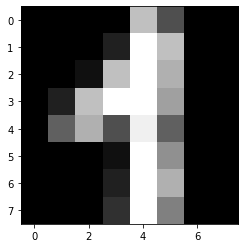

In [2]:
digits = load_digits()
data, labels = digits.data, digits.target

print(f"Shape of data matrix: {data.shape}")
print(f"Shape of label matrix: {labels.shape}")

# Example image
plt.imshow(digits.images[42], cmap="gray");

### 8.2 Standardization  <a class="anchor" id="standardization"></a>

Before we can apply PCA we should standardize the data. If you are wondering why this is necessary [check out this explanation on StackExchange](https://stats.stackexchange.com/questions/69157/why-do-we-need-to-normalize-data-before-principal-component-analysis-pca). Standardization rescales the data to have mean zero and standard deviation one.

In [3]:
mean = np.mean(data, axis=0)
std = np.std(data, axis=0)
# If values have a standard deviation of zero, the normalization step
# will contain a division by zero. To prevent this we replace standard
# deviations of zero with one.
std[std == 0] = 1.
data_norm = (data - mean) / std

# We could also perform standardization using scikit learn
from sklearn.preprocessing import StandardScaler
data_norm_sklearn = StandardScaler().fit_transform(data)

### 8.3 Computing the data covariance matrix  <a class="anchor" id="comp-cov-matrix"></a>

To find the principal components we first have to compute the data covariance matrix $\boldsymbol{S}$:

$\boldsymbol{S} = \frac{1}{N} \sum_{n=1}^{N} \boldsymbol{x}_n \boldsymbol{x}_n^T$

We can summarize the summation as follows:

$\boldsymbol{S} = \frac{1}{N} \boldsymbol{X}^T \boldsymbol{X}$

In [4]:
n_samples, n_features = data_norm.shape
cov_matrix = (data_norm.T.dot(data_norm)) / (n_samples)

# We could also compute the covariance matrix with numpy (see code below)
# Note: the numpy implementation divides by n_samples - 1. This
# is known as Bessel's correction. Refer to the corresponding 
# Wikipedia article if interested in more details.
cov_matrix_numpy = np.cov(data_norm.T)

### 8.4 Computing the eigenvalues and eigenvectors  <a class="anchor" id="comp-eig-vals"></a>

To compute eigenvalues and eigenvectors we perform an eigendecomposition of the covariance matrix $\boldsymbol{S}$. Doing this manually is messy and it's hard to do the computations correctly. Therefore, we will make use of numpy to get both eigenvalues and eigenvectors. If you want to learn more about how to perform an eigendecomposition take a look at the [Wikipedia article](https://en.wikipedia.org/wiki/Eigendecomposition_of_a_matrix#Numerical_computations).



In [5]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print(f"Shape of eigenvalue matrix: {eig_vals.shape}")
print(f"Shape of eigenvectors matrix: {eig_vecs.shape}")
print("=====================================")

# We want to find the eigenvectors with the highest eigenvalues. 
# To do so, we use argsort which returns the indices that would 
# sort the array of eigenvalues. Since we want to sort from largest
# to lowest value we need to reverse the order of the result
sorted_indices = np.argsort(eig_vals)[::-1]

# Look at the first few eigenvalues to make sure that we sorted them correctly
for idx in sorted_indices[:3]:
    print(f"Eigenvalue: {eig_vals[idx]}")   

Shape of eigenvalue matrix: (64,)
Shape of eigenvectors matrix: (64, 64)
Eigenvalue: 7.340688819618325
Eigenvalue: 5.832243185889725
Eigenvalue: 5.151093084500989


### 8.5 Choosing the number of eigenvalues <a class="anchor" id="num-eig-vals"></a>

In order to decide how many eigenvalues we want to use we should ask ourselves what our goal is. Remember that the number of eigenvalues that we select corresponds to the dimensionality of the new low-dimensional space we are creating.

Most of the time, PCA is used to reduce the dimensionality of data. But at the same time we want to make sure that our solution is good, meaning that we don't lose a lot of information. Consequently, we should try to select the eigenvalues that explain most of the variance in the data.

Typically, the first few eigenvalues capture most of the variance whereas later ones don't add much information. When using tools like scikit-learn we can specify how much variance should be explained by the solution so we don't have to choose the number of eigenvalues ourselves.

In our case we can decide how many principal components to use by computing the *explained variance* of the individual eigenvectors.

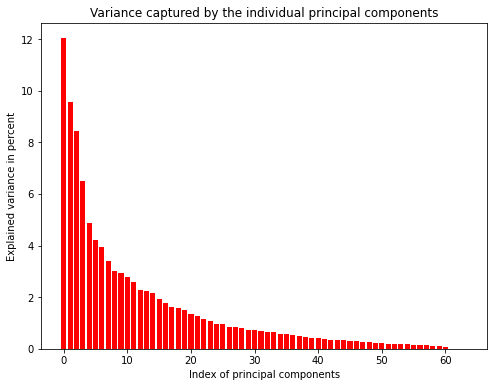

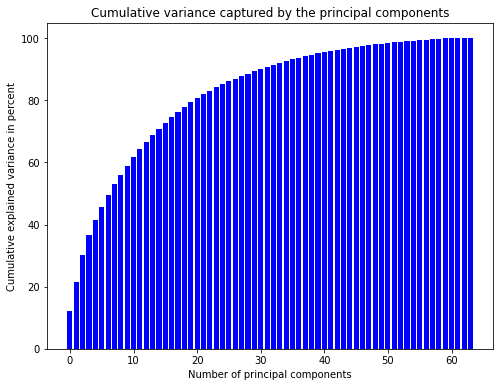

In [6]:
sum_eig_vals = sum(eig_vals)
sorted_eig_vals = sorted(eig_vals, reverse=True)
explained_variance = [(eig_val / sum_eig_vals) *  100 for eig_val in sorted_eig_vals]
cumulative_explained_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8, 6))
plt.bar(range(len(eig_vals)), explained_variance, label="Explained variance", color="red")
plt.xlabel("Index of principal components")
plt.ylabel("Explained variance in percent")
plt.title("Variance captured by the individual principal components")
plt.show()

plt.figure(figsize=(8, 6))
plt.bar(range(len(eig_vals)), cumulative_explained_variance, label="Cumulative explained variance", color="blue")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative explained variance in percent")
plt.title("Cumulative variance captured by the principal components")
plt.show()

The upper plot shows that the first principal components explain more variance than latter ones. However, the amount of variance explained is not very high. Consequently, we would lose a lot of information when using only the first few principal components. The lower plot shows that we would have to keep 31 principal components to explain 90% of the variance. This is a lot but still better than keeping all 64 values.

For the purpose of this tutorial we will keep only the 2 largest eigenvalues and their corresponding eigenvectors. This will allow us to visualize the result in two dimensions.

In [7]:
# Select only the number of eigenvalues / principal components that we want to use
n_principal_comps = 2
eig_vals = eig_vals[sorted_indices[:n_principal_comps]]
eig_vecs = eig_vecs[:, sorted_indices[:n_principal_comps]]

print(f"Eigenvalues shape: {eig_vals.shape}")
print(f"Eigenvectors shape: {eig_vecs.shape}")

Eigenvalues shape: (2,)
Eigenvectors shape: (64, 2)


### 8.6 Constructing the projection matrix  <a class="anchor" id="proj-matrix"></a>

After finding the eigenvectors/principal components we can arrange them into a matrix (our *projection matrix* $\boldsymbol{B}$).

In [8]:
vector_list = [vec.reshape(n_features, 1) for vec in eig_vecs.T]
proj_matrix = np.hstack(vector_list) # This is our projection matrix B
print(f"Shape of projection matrix: {proj_matrix.shape}")

Shape of projection matrix: (64, 2)


### 8.7 Projecting the data  <a class="anchor" id="proj-data"></a>

In order to actually project the original data $\boldsymbol{X}$ into the lower-dimensional space we multiply it with the matrix $\boldsymbol{B}$:

$\boldsymbol{Z} = \boldsymbol{X} \boldsymbol{B} \in \mathbb{R}^{N x M}$

<img src="figures/pca_digits_matrix_multiplications.png" width="600"/>

In [9]:
data_proj = data_norm.dot(proj_matrix) # This is our compressed data matrix Z
print(f"Shape of projected data matrix: {data_proj.shape}")

Shape of projected data matrix: (1797, 2)


### 8.8 Plotting the transformed data  <a class="anchor" id="plot-data"></a>

With only two principal components we can plot the transformed data easily. One axis will correspond to the first principle component, the other axis to the second.

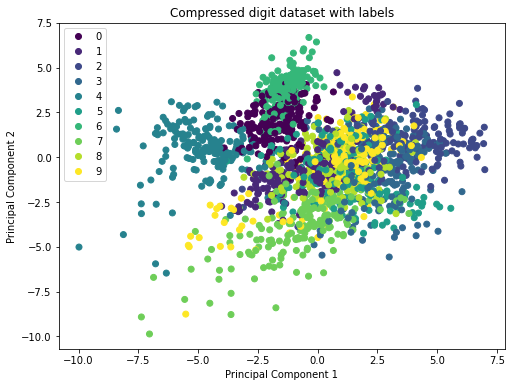

In [10]:
labels_str = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

plt.figure(figsize=(8, 6))
scatter = plt.scatter(data_proj[:, 0], data_proj[:, 1], c=labels)
plt.legend(handles=scatter.legend_elements()[0], labels=labels_str, loc="upper left")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("Compressed digit dataset with labels")
plt.show();

# Stackoverflow post to add legend: 
# https://stackoverflow.com/questions/17411940/matplotlib-scatter-plot-legend

### 8.9 Comparison to scikit-learn  <a class="anchor" id="sklearn-comparison"></a>

In practice it doesn't make sense to perform PCA manually. Instead, we can use packages like scikit-learn. This simplifies the computation substantially. Let's apply PCA as contained in scikit-learn to the digits dataset and compare it to our solution. As visibile in the plot below, our implementation of PCA gives the same result as the scikit-learn version!

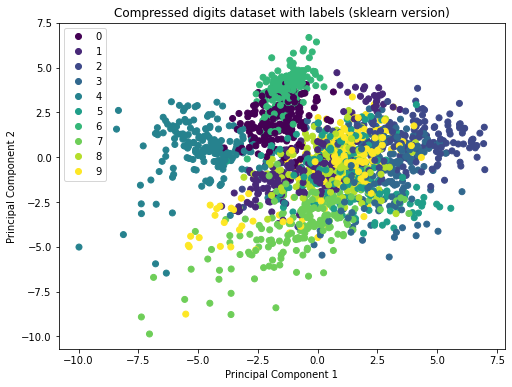

In [11]:
from sklearn.decomposition import PCA
sklearn_pca = PCA(n_components=2)
data_proj_sklearn = sklearn_pca.fit_transform(data_norm)
# The eigenvectors in scikit-learn will point into the opposite direction
# compared to our eigenvectors (in other words: they are flipped). This
# does not make a difference regarding the solution. However, to make 
# sure that we get exactly the same plot we multiply the result by -1.
data_proj_sklearn *= -1

plt.figure(figsize=(8, 6))
scatter = plt.scatter(data_proj_sklearn[:, 0], data_proj_sklearn[:, 1], c=labels, label=labels_str)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=scatter.legend_elements()[0], labels=labels_str, loc="upper left")
plt.title("Compressed digits dataset with labels (sklearn version)")
plt.show()

## 9. Sources and further reading <a class="anchor" id="sources"></a> 

The basis for this notebook is chapter 10 of the book [Mathematics for Machine Learning](https://mml-book.com). I can highly recommend to read through the chapter to get a deeper understanding of PCA.

Another fantastic explanation of PCA is given [in this post on StackExchange](https://stats.stackexchange.com/a/140579). 